In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/jyotsana/Downloads/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
%%capture
! pip install seaborn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [6]:
print(df.dtypes)

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.shape

(200, 5)

In [10]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [11]:
# Dropping the irrelavant columns 
drop_cols = ['Unnamed: 0']
df = df.drop(drop_cols, axis=1)
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


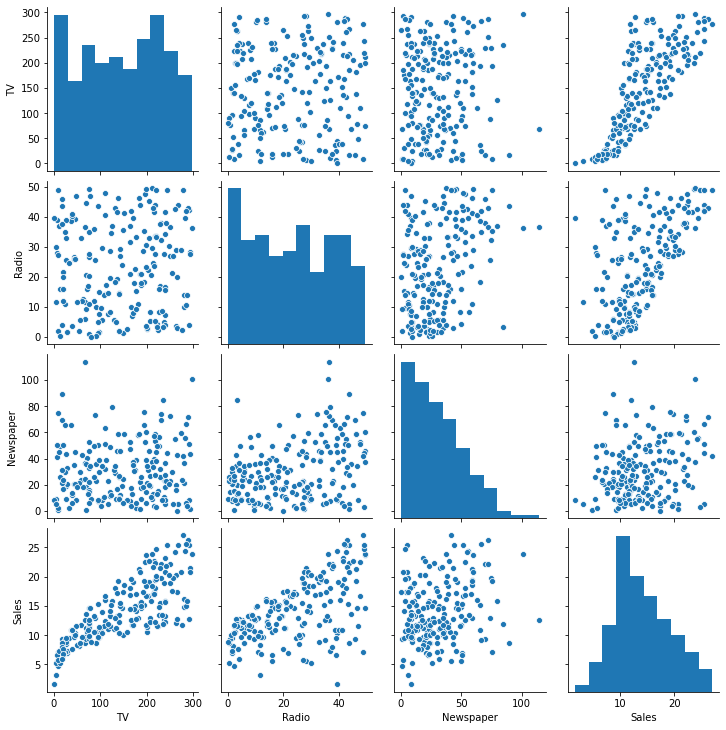

In [12]:
sns.pairplot(df)

In [13]:
df[df.isnull()]

,TV,Radio,Newspaper,Sales
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
195,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
# Calculate the number of categorical and the number of numerical
categorical = [var for var in df.columns if df[var].dtypes == 'object']
print(len(categorical))

numerical = [var for var in df.columns if df[var].dtypes != 'object']
print(len(numerical))

0
4


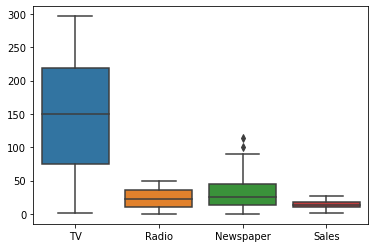

In [16]:
sns.boxplot(data=df)

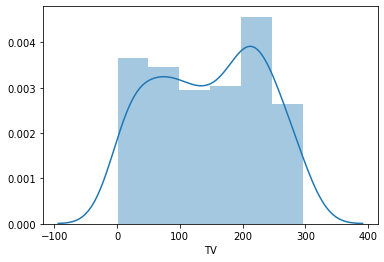

In [17]:
sns.distplot(df['TV'])

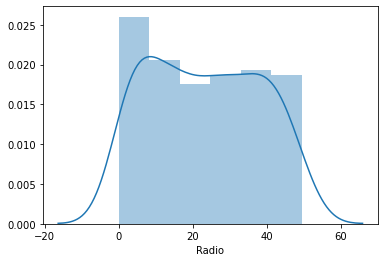

In [18]:
sns.distplot(df['Radio'])

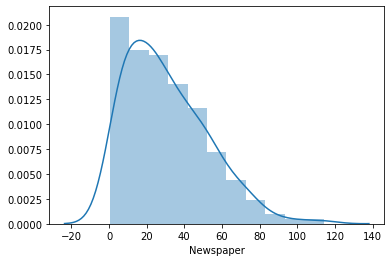

In [19]:
sns.distplot(df['Newspaper'])

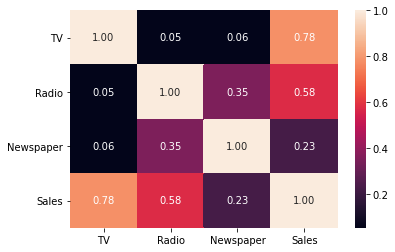

In [20]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [21]:
X = df[['TV','Radio' , 'Newspaper']]
y = df['Sales']

In [22]:
import statsmodels.api as sm 
import pylab as py 

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=24)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
X_train

,TV,Radio,Newspaper
5,8.7,48.9,75.0
154,187.8,21.1,9.5
173,168.4,7.1,12.8
187,191.1,28.7,18.2
108,13.1,0.4,25.6
...,...,...,...
145,140.3,1.9,9.0
87,110.7,40.6,63.2
192,17.2,4.1,31.6
131,265.2,2.9,43.0


In [26]:
coeff_df2 = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df2

,Coefficient
TV,0.046353
Radio,0.187757
Newspaper,-0.005778


In [27]:
X_endog = sm.add_constant(X_train)

In [28]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [29]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     441.6
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           5.51e-76
Time:                        22:01:24   Log-Likelihood:                -312.61
No. Observations:                 160   AIC:                             633.2
Df Residuals:                     156   BIC:                             645.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0310      0.357      8.487      0.000       2.326       3.736
TV             0.0464      0.002     28.804      0.000       0.043       0.050
Radio          0.1878      0.010     19.135      0.000       0.168       0.207
Newspaper     -0.0058      0.007     -0.872      0.384      -0.019       0.007
==============================================================================
Omnibus:                       55.686   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.509
Skew:                          -1.432   Prob(JB):                     5.64e-33
Kurtosis:                       6.752   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
y_pred = regressor.predict(X_train)

In [31]:
df1 = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df1

,Actual,Predicted
5,7.2,12.182226
154,15.6,15.642800
173,11.7,12.095898
187,17.3,17.172446
108,5.3,3.565409
...,...,...
145,10.3,9.839011
87,16.0,15.419993
192,5.9,4.415487
131,12.7,15.619761


In [32]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 1.2706044439819906
Mean Squared Error: 2.91449751348508
Root Mean Squared Error: 1.7071899465159348


In [33]:
X1 = df[['TV','Radio']]
y1 = df['Sales']

In [34]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test =train_test_split(X1, y1, test_size=0.2, random_state=24)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

LinearRegression()

In [36]:
X1_train

,TV,Radio
5,8.7,48.9
154,187.8,21.1
173,168.4,7.1
187,191.1,28.7
108,13.1,0.4
...,...,...
145,140.3,1.9
87,110.7,40.6
192,17.2,4.1
131,265.2,2.9


In [37]:
coeff_df3 = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])
coeff_df3

,Coefficient
TV,0.046389
Radio,0.184767


In [38]:
X1_endog = sm.add_constant(X1_train)

In [39]:
res = sm.OLS(y1_train, X1_endog)
res.fit()

In [40]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     663.0
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           2.77e-77
Time:                        22:04:00   Log-Likelihood:                -313.00
No. Observations:                 160   AIC:                             632.0
Df Residuals:                     157   BIC:                             641.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9180      0.333      8.774      0.000       2.261       3.575
TV             0.0464      0.002     28.859      0.000       0.043       0.050
Radio          0.1848      0.009     20.110      0.000       0.167       0.203
==============================================================================
Omnibus:                       52.757   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.787
Skew:                          -1.391   Prob(JB):                     6.56e-29
Kurtosis:                       6.425   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
y1_pred = regressor.predict(X1_train)

In [42]:
df4 = pd.DataFrame({'Actual': y1_train, 'Predicted': y1_pred})
df4

,Actual,Predicted
5,7.2,12.356703
154,15.6,15.528521
173,11.7,12.041827
187,17.3,17.085835
108,5.3,3.599614
...,...,...
145,10.3,9.777496
87,16.0,15.554855
192,5.9,4.473449
131,12.7,15.756300


In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_train, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_train, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_train, y1_pred)))

Mean Absolute Error: 1.284578938587654
Mean Squared Error: 2.928719326629756
Root Mean Squared Error: 1.7113501472900734


# TV vs Sales

In [42]:
from scipy import stats

P-value:

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.

the p-value is  <  0.05: there is moderate evidence that the correlation is significant.

the p-value is  <  0.1: there is weak evidence that the correlation is significant.

the p-value is  >  0.1: there is no evidence that the correlation is significant.

# Correlation and Causation

Correlation: a measure of the extent of interdependence between variables.

Causation: the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.

0: No linear correlation, the two variables most likely do not affect each other.

-1: Total negative linear correlation.

Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [43]:
pearson_coef, p_value = stats.pearsonr(df['TV'], df['Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7822244248616064  with a P-value of P = 1.467389700194802e-42


Conclusion:
Since the p-value is  <  0.001, the correlation between TV and Sales is statistically significant, although the linear relationship is extremely strong (~0.782, close to 1)

In [44]:
pearson_coef, p_value = stats.pearsonr(df['Radio'], df['Sales'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5762225745710552  with a P-value of P = 4.354966001767037e-19


Conclusion: Since the p-value is < 0.001, the correlation between Radio and Sales is statistically significant, although the linear relationship is moderate (~0.576)